In [1]:
# importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read file to get username and password
myvars = {}
with open("amulumu-mysql-password_1") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
        
# Connecting to the mysql database        
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'],
                       db='I501jolburnsSpring23grp_01_db')
cursor = conn.cursor()
# Fetching data from MYSQL database table postpartum
cursor.execute('SELECT * from postpartum_1');
data = pd.DataFrame(list(cursor.fetchall()))
#data = data.iloc[0:,1:]
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
1,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
2,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
3,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
4,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No


In [3]:
# Read first row of dataframe as header and remaining rows as body
headers_1 = data.iloc[0,0:].values
body = data.iloc[1:,0:].values
# create dataframe using header and body
data = pd.DataFrame(body,columns=headers_1)
data.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [4]:
# Data overview
print("Rows : ",data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())

Rows :  1503
Columns  :  11

Features : 
 ['Timestamp', 'Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']


In [5]:
for each in data:
    data[each] = data[[each]].applymap(lambda x: x if x != "" else None)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [7]:
# looking at the null values
data.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [8]:
# Handling the null values by backward filling the data.
data['Irritable towards baby & partner'] = data['Irritable towards baby & partner'].fillna(method = 'bfill')
data['Problems concentrating or making decision'] = data['Problems concentrating or making decision'].fillna(method = 'bfill')
data['Feeling of guilt'] = data['Feeling of guilt'].fillna(method = 'bfill')

In [9]:
# looking at the null values
data.isnull().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [10]:
# renaming the column names

data = data.rename(columns={'Age': 'age'})
data = data.rename(columns={'Feeling sad or Tearful': 'feeling_sad_tearful'})
data = data.rename(columns={'Irritable towards baby & partner': 'irritable_towards_baby_partner'})
data = data.rename(columns={'Trouble sleeping at night': 'trouble_sleeping_at_night'})
data = data.rename(columns={'Problems concentrating or making decision': 'problem_concentrating_making_decision'})
data = data.rename(columns={'Overeating or loss of appetite': 'overeating_loss_of_appetite'})
data = data.rename(columns={'Feeling anxious': 'feeling_anxious'})
data = data.rename(columns={'Feeling of guilt': 'feeling_guilt'})
data = data.rename(columns={'Problems of bonding with baby': 'problems_of_bonding_with_baby'})
data = data.rename(columns={'Suicide attempt': 'suicide_attempt'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Timestamp                              1503 non-null   object
 1   age                                    1503 non-null   object
 2   feeling_sad_tearful                    1503 non-null   object
 3   irritable_towards_baby_partner         1503 non-null   object
 4   trouble_sleeping_at_night              1503 non-null   object
 5   problem_concentrating_making_decision  1503 non-null   object
 6   overeating_loss_of_appetite            1503 non-null   object
 7   feeling_anxious                        1503 non-null   object
 8   feeling_guilt                          1503 non-null   object
 9   problems_of_bonding_with_baby          1503 non-null   object
 10  suicide_attempt                        1503 non-null   object
dtypes: object(11)
mem

In [11]:
# Let us now see the value counts in each class except the class named TimeStamp as it anyways be different
col_names = ['age', 'feeling_sad_tearful','irritable_towards_baby_partner',
             'trouble_sleeping_at_night','problem_concentrating_making_decision',
             'overeating_loss_of_appetite','feeling_guilt','problems_of_bonding_with_baby','suicide_attempt']

# Age column Each class counts
print(col_names[0])
print ("-------------")
print(data[col_names[0]].value_counts())


age
-------------
40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: age, dtype: int64


In [12]:
# Feeling sad or Tearful column
print(col_names[1])
print ("----------------")
print(data[col_names[1]].value_counts())

feeling_sad_tearful
----------------
Yes          536
No           524
Sometimes    443
Name: feeling_sad_tearful, dtype: int64


In [13]:
# Irritable towards baby & partner
print(col_names[2])
print ("-----------------------------")
print(data[col_names[2]].value_counts())

irritable_towards_baby_partner
-----------------------------
Yes          561
No           499
Sometimes    443
Name: irritable_towards_baby_partner, dtype: int64


In [14]:
# Trouble sleeping at night column
print(col_names[3])
print ("------------------------------")
print(data[col_names[3]].value_counts())

trouble_sleeping_at_night
------------------------------
Two or more days a week    640
Yes                        445
No                         418
Name: trouble_sleeping_at_night, dtype: int64


In [15]:
# Problems concentrating or making decision
print(col_names[4])
print ("----------------------------------")
print(data[col_names[4]].value_counts())

problem_concentrating_making_decision
----------------------------------
No       583
Often    473
Yes      447
Name: problem_concentrating_making_decision, dtype: int64


In [16]:
# Overeating or loss of appetite column
print(col_names[5])
print ("---------------------------")
print(data[col_names[5]].value_counts())

overeating_loss_of_appetite
---------------------------
No            841
Yes           343
Not at all    319
Name: overeating_loss_of_appetite, dtype: int64


In [17]:
# Feeling guilty  column
print(col_names[6])
print ("----------------")
print(data[col_names[6]].value_counts())

feeling_guilt
----------------
No       633
Maybe    528
Yes      342
Name: feeling_guilt, dtype: int64


In [18]:
# Problems of bonding with baby column
print(col_names[7])
print ("-----------------------------")
print(data[col_names[7]].value_counts())

problems_of_bonding_with_baby
-----------------------------
No           557
Sometimes    542
Yes          404
Name: problems_of_bonding_with_baby, dtype: int64


In [19]:
# Sucide attempt column
print(col_names[8])
print ("-----------------------")
print(data[col_names[8]].value_counts())

suicide_attempt
-----------------------
No                       709
Yes                      459
Not interested to say    335
Name: suicide_attempt, dtype: int64


<Axes: xlabel='feeling_anxious', ylabel='count'>

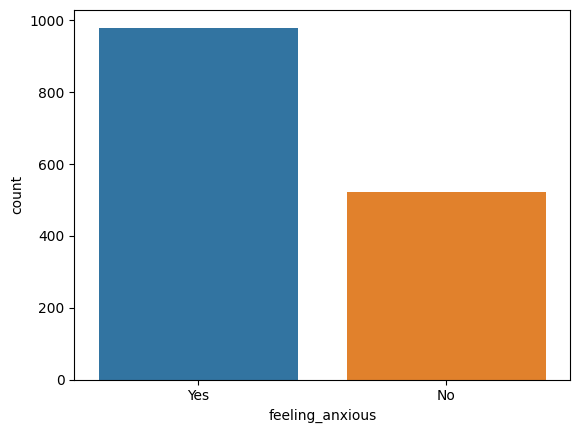

In [20]:
# Now let's see the count of target variable.
sns.countplot(x="feeling_anxious",data=data, width = 0.8)

In [21]:
# feeling anxious
print("feeling_anxious")
print ("-----------------------------")
print(data["feeling_anxious"].value_counts())

feeling_anxious
-----------------------------
Yes    980
No     523
Name: feeling_anxious, dtype: int64


From the above value counts we can observe there is slight data imabalance in the target variable.

In [22]:
# we have already saw the count in each varibles, now visualise all the variables that existing.

target_variable = "feeling_anxious"
col_names


['age',
 'feeling_sad_tearful',
 'irritable_towards_baby_partner',
 'trouble_sleeping_at_night',
 'problem_concentrating_making_decision',
 'overeating_loss_of_appetite',
 'feeling_guilt',
 'problems_of_bonding_with_baby',
 'suicide_attempt']

<Axes: ylabel='Count'>

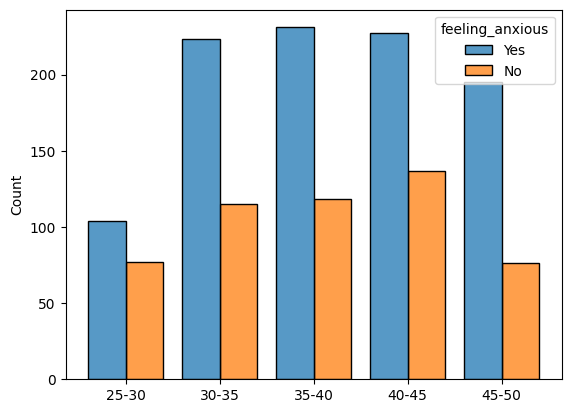

In [23]:
# Bar Plot showing target variable by Age group
age_categories = pd.Categorical(data[col_names[0]], categories=['25-30','30-35','35-40','40-45','45-50'], ordered=True)
sns.histplot(data=data, x=age_categories, hue=target_variable, multiple='dodge', shrink=0.8)


The age groups of 30-35,40-45,35-40 have almost the same and highest anxious positivity rate.

The other two age groups recorded the least anxious rate of almost same rate.

The age group 25-30 is quiet safer with less number of positive and negative cases compared to all other groups

<Axes: xlabel='feeling_sad_tearful', ylabel='Count'>

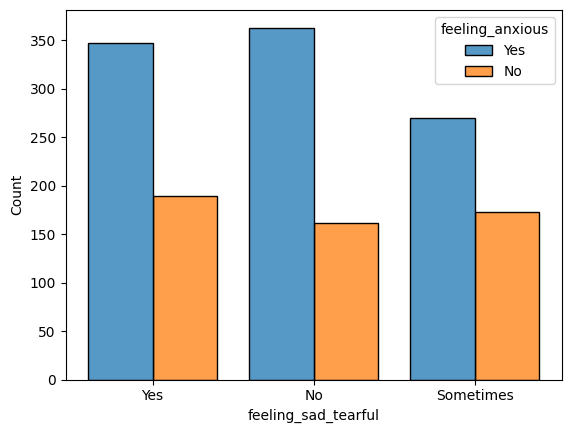

In [24]:
# Bar Plot showing target variable by Feeling sad or Tearful column
sns.histplot(data=data, x=col_names[1], hue=target_variable, multiple='dodge', shrink=0.8)


From the above data when women are not feeling sad it indicates they are mostly anxious and which is quite confusing to accept and there is a thin margin between women felling sad or not and women to be anxious. Even in terms of women not feeling sad are not anxious. In both the cases when women are not feeling sad resulting in major contributions.

<Axes: xlabel='irritable_towards_baby_partner', ylabel='Count'>

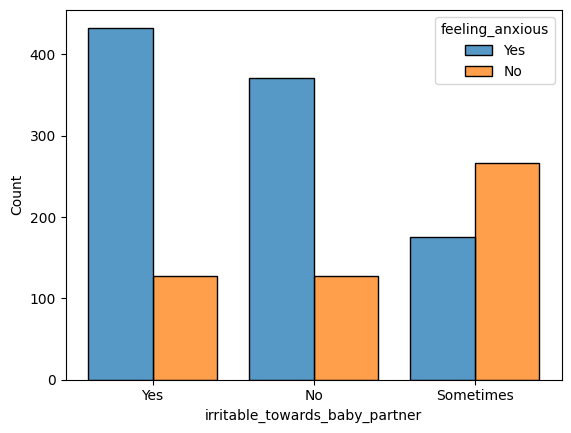

In [25]:
# Bar Plot showing target variable by Irritable towards baby or partner column
sns.histplot(data=data, x=col_names[2], hue=target_variable, multiple='dodge', shrink=0.8)

The above is as expected as when women are getting irritated they feel a lot of anxious and the data proves the same and quiet oppositely when poeple are not anxious it has the equal ratio of women getting irritated or not.

<Axes: xlabel='trouble_sleeping_at_night', ylabel='Count'>

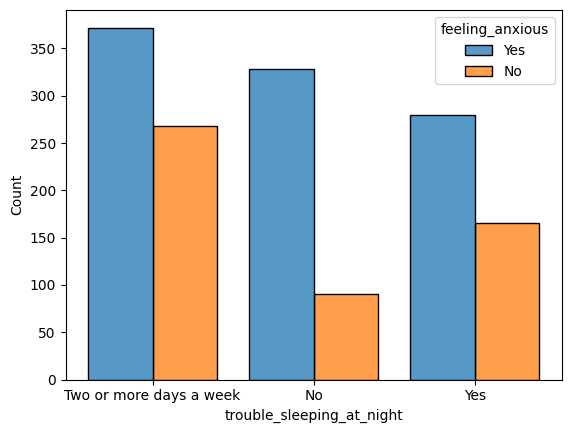

In [26]:
# Bar Plot showing target variable by Trouble sleeping at night column
sns.histplot(data=data, x=col_names[3], hue=target_variable, multiple='dodge', shrink=0.8)

For women having trouble sleeping for more than two days has the major anxious rate and is linearly decreasing fo women with out sleping problem and women with sleeping problem. women who are not anxious are generally women who dont have any kind of sleeping problem at night.

<Axes: xlabel='problem_concentrating_making_decision', ylabel='Count'>

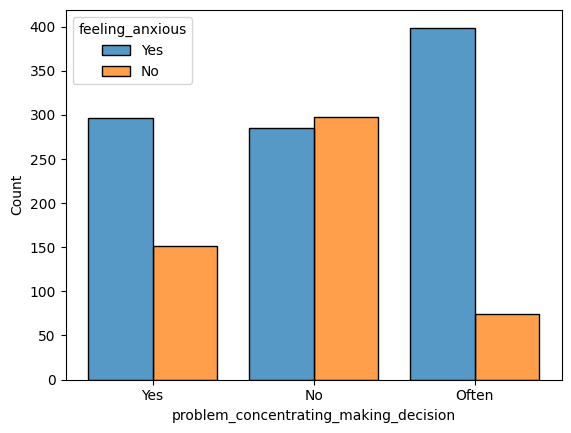

In [27]:
# Bar Plot showing target variable by Problem Concentraing or making decision column
sns.histplot(data=data, x=col_names[4], hue=target_variable, multiple='dodge', shrink=0.8)

The anxious rate is simlar for both yes and no for the column problem concentraing or making the decision. The women who often feel problem concentrating has the highest anxious rate. Simlarly those women have the lowest anxious rate as well.

<Axes: xlabel='overeating_loss_of_appetite', ylabel='Count'>

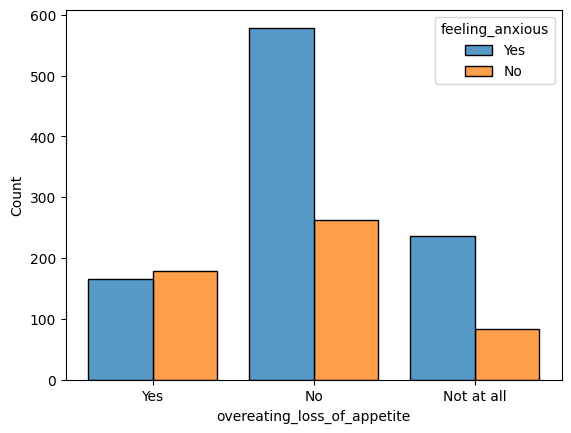

In [28]:
# Bar Plot showing target variable by Overeating or loss of apetite column
sns.histplot(data=data, x=col_names[5], hue=target_variable, multiple='dodge', shrink=0.8)

This is one of the interesting column and according to the data women who do not overeat has the highest anxious rate comapred to who eat and by this column we can suggest that overeating will not the affect the anxious rate and it is decreasing the anxious rate in a good amount.

<Axes: xlabel='feeling_guilt', ylabel='Count'>

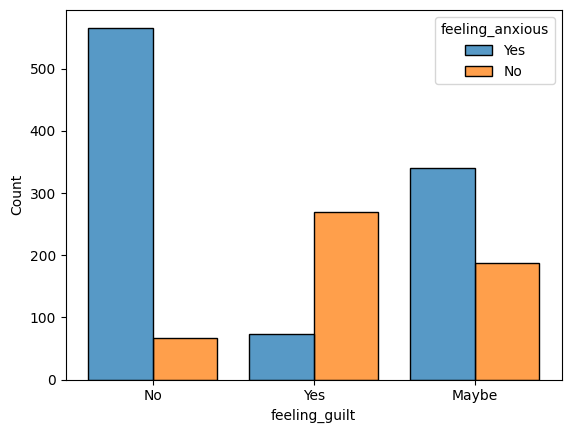

In [29]:
# Bar Plot showing target variable by Feeling guilty column
sns.histplot(data=data, x=col_names[6], hue=target_variable, multiple='dodge', shrink=0.8)

The women who are not guilty are mostly anxious which seems to be contracdicting whereas people who are guilty has the least anxious rate.
In a vice versa manner both the columns got inversed and women who taught that they might be gulity stand in between both of the other two columns.

<Axes: xlabel='problems_of_bonding_with_baby', ylabel='Count'>

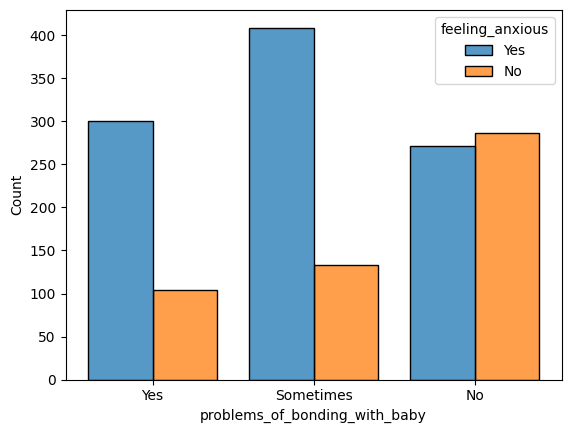

In [30]:
# Bar Plot showing target variable by problems of bounding with baby column
sns.histplot(data=data, x=col_names[7], hue=target_variable, multiple='dodge', shrink=0.8)

women who felt bonding sometimes with baby resulted in the maximum of anxious rate where it stands almost equal anxious rate for who bonding with baby was't the case.

<Axes: xlabel='suicide_attempt', ylabel='Count'>

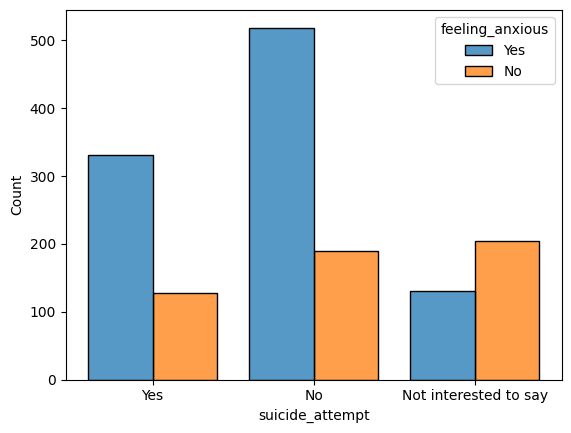

In [31]:
# Bar Plot showing target variable by Sucide attempt column
sns.histplot(data=data, x=col_names[8], hue=target_variable, multiple='dodge', shrink=0.8)

In [32]:
# Loading data into a new data frame
df= pd.DataFrame(data)
df.head()

,Timestamp,age,feeling_sad_tearful,irritable_towards_baby_partner,trouble_sleeping_at_night,problem_concentrating_making_decision,overeating_loss_of_appetite,feeling_anxious,feeling_guilt,problems_of_bonding_with_baby,suicide_attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


(<Figure size 640x480 with 3 Axes>,
 {('Yes', 'Yes'): (0.0, 0.0, 0.3023655658979072, 0.7187371072459992),
  ('Yes', 'No'): (0.0,
   0.7220593663822117,
   0.3023655658979072,
   0.27794063361778815),
  ('No', 'Yes'): (0.30731606094741215,
   0.0,
   0.4670526932932814,
   0.7295849753290629),
  ('No', 'No'): (0.30731606094741215,
   0.7329072344652755,
   0.4670526932932814,
   0.2670927655347244),
  ('Not interested to say', 'Yes'): (0.7793192492901985,
   0.0,
   0.22068075070980153,
   0.3867704666038578),
  ('Not interested to say', 'No'): (0.7793192492901985,
   0.3900927257400704,
   0.22068075070980153,
   0.6099072742599295)})

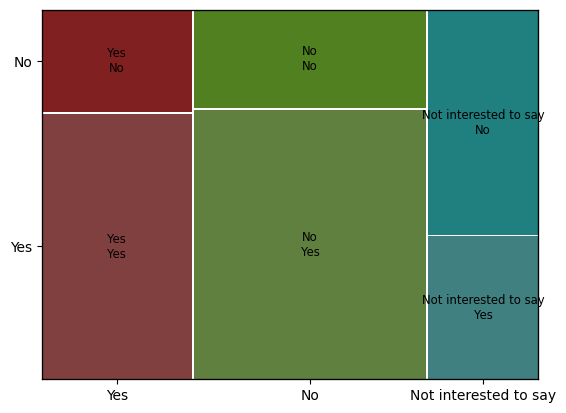

In [33]:
# A mosaic plot can be used to compare and visualise well
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['suicide_attempt', target_variable])

<Axes: xlabel='age', ylabel='feeling_sad_tearful'>

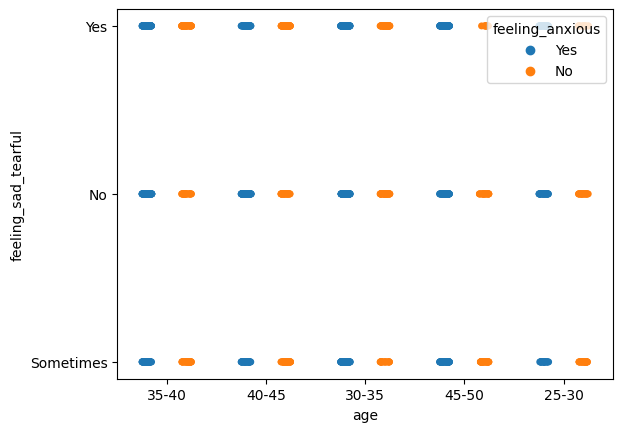

In [34]:
# Bivariate analysis : As all there are categorical varibles, applying any kind of bivariate analysis would give us any kind of understanding about the data insights so, we try to calculate the frequency count logic and establish a relation between them.
sns.stripplot(x=col_names[0], y=col_names[1], hue=target_variable, data=data, jitter=True, dodge=True)


<Axes: >

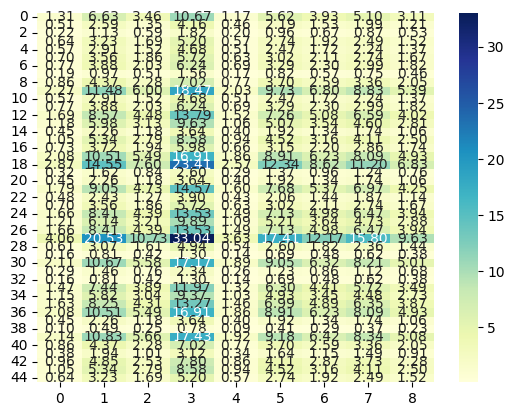

In [35]:
# Establishing the relations between multiples variables
from scipy.stats import chi2_contingency
cont_table = pd.crosstab([df['age'], df['feeling_sad_tearful'],df["overeating_loss_of_appetite"]], 
                         [df['trouble_sleeping_at_night'],df["problem_concentrating_making_decision"]])
chi2, p, dof, expected = chi2_contingency(cont_table)
sns.heatmap(expected, cmap='YlGnBu', annot=True, fmt='.2f')

So when we include multiple variables it is not possib;e to understand the insights provided by the data.

Let us relate few variables and draw a heatmap to understand the insights in the data.

<Axes: >

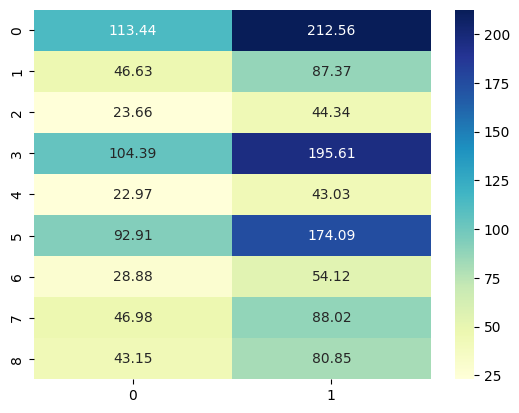

In [36]:
# So here is the heatmap for 3 variables
cont_table = pd.crosstab([ df['feeling_guilt'],df['suicide_attempt']], df['feeling_anxious'])
chi2, p, dof, expected = chi2_contingency(cont_table)
sns.heatmap(expected, cmap='YlGnBu', annot=True, fmt='.2f')

The X-axis is the feeling anxious column and the Y-axis is the age and the suicide attemp column.

So in xaxis 0 indicates the no anxious feeling and 1 indicates that he has the anxious feeling.
Y-axis is the combination of both feeling guilty and suicide attemp as both of them has 3 unique values the total number of combinations would be 3*3 = 9 

To interpret them, in feeling guilt column we have Yes, no , maybe and in suicide attemp column we have Yes , no ,not interest to say.

So here 0 indicates Yes(feeling guilt), Yes(Suicide Attempt) ;
1 indicates Yes(Feeling guilt), No(Suicide Attempt)
.
.
.

By results we can say most people are feeling anxious when they are feeling guilt and has a feeling of suicide. As it has the highest weightage in the graph

<Axes: >

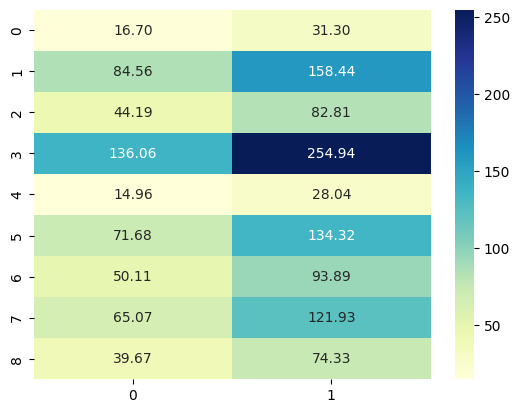

In [37]:
# Heatmap of remaining variables
cont_table = pd.crosstab([ df['trouble_sleeping_at_night'],df['problem_concentrating_making_decision']], df['feeling_anxious'])
chi2, p, dof, expected = chi2_contingency(cont_table)
sns.heatmap(expected, cmap='YlGnBu', annot=True, fmt='.2f')

In [38]:
# But before constructing the heatmap lets now converte all the categorical values into numerical by label encoder or one hot encoder.
from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()

# Fetching the labels.
get_labels=gle.fit_transform(data['age'])
# Assigning the labels that are generated and every column would follow the same steps. 
data['age_label']=get_labels


get_labels=gle.fit_transform(data['feeling_sad_tearful'])
data['feeling_sad_tearful_label']=get_labels


get_labels=gle.fit_transform(data['irritable_towards_baby_partner'])
data['irritable_towards_baby_partner_label']=get_labels


get_labels=gle.fit_transform(data['trouble_sleeping_at_night'])
data['trouble_sleeping_at_night_label']=get_labels


get_labels=gle.fit_transform(data['problem_concentrating_making_decision'])
data['problem_concentrating_making_decision_label']=get_labels


get_labels=gle.fit_transform(data['overeating_loss_of_appetite'])
data['overeating_loss_of_appetite_label']=get_labels


get_labels=gle.fit_transform(data['feeling_guilt'])
data['feeling_guilt_label']=get_labels


get_labels=gle.fit_transform(data['problems_of_bonding_with_baby'])
data['problems_of_bonding_with_baby_label']=get_labels


get_labels=gle.fit_transform(data['suicide_attempt'])
data['suicide_attempt_label']=get_labels

# removing the old columns
data.drop([
 'Timestamp',
 'age',
 'feeling_sad_tearful',
 'irritable_towards_baby_partner',
 'trouble_sleeping_at_night',
 'problem_concentrating_making_decision',
 'overeating_loss_of_appetite',
 'feeling_guilt',
 'problems_of_bonding_with_baby',
 'suicide_attempt'],axis=1,inplace=True)

In [39]:
# Even applying the Label encoder to the target column
get_labels=gle.fit_transform(data['feeling_anxious'])
data['feeling_anxious_label']=get_labels

data.drop(['feeling_anxious'],axis=1,inplace=True)

In [40]:
# Now you can observe that all the catgorigal data has been transformed into numercial values.
data

,age_label,feeling_sad_tearful_label,irritable_towards_baby_partner_label,trouble_sleeping_at_night_label,problem_concentrating_making_decision_label,overeating_loss_of_appetite_label,feeling_guilt_label,problems_of_bonding_with_baby_label,suicide_attempt_label,feeling_anxious_label
0,2,2,2,1,2,2,1,2,2,1
1,3,2,0,0,2,2,2,2,0,0
2,2,2,0,2,2,2,1,1,0,1
3,2,2,2,2,2,0,0,0,0,1
4,3,2,0,1,2,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1498,1,2,0,1,0,0,0,1,0,1
1499,0,1,0,0,1,0,0,2,0,1
1500,0,0,1,1,0,0,2,0,1,0
1501,0,0,1,2,1,0,1,0,0,1


In [41]:
col_list = data.columns
print(col_list)

Index(['age_label', 'feeling_sad_tearful_label',
       'irritable_towards_baby_partner_label',
       'trouble_sleeping_at_night_label',
       'problem_concentrating_making_decision_label',
       'overeating_loss_of_appetite_label', 'feeling_guilt_label',
       'problems_of_bonding_with_baby_label', 'suicide_attempt_label',
       'feeling_anxious_label'],
      dtype='object')


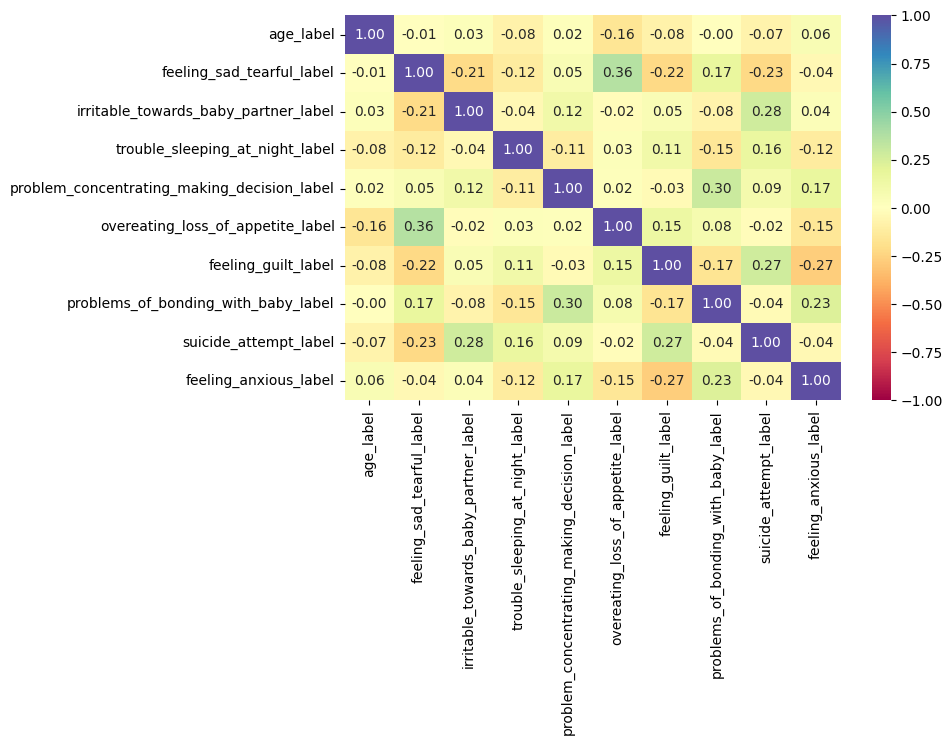

In [42]:
# heatmap with columns after encoding
plt.figure(figsize=(8, 5))
sns.heatmap(
    data[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.savefig('heatmap.jpg', bbox_inches = 'tight')
plt.show()


HYPOTHESIS TESTING

In [43]:
# We have already mentioned the hypothesis testing
# Null hypothesis H0: is ‘age’, ‘Trouble sleeping at night’, ‘Overeating, or loss of appetite’ do not have a significant impact on postpartum depression.
# Alternate hypothesis Ha: is that these three have an imapact on the postpartum depression.

# As the data is discrete in the sense categorical we can use chi-square or a fischer test.

from scipy.stats import chi2_contingency
contingency_table_1 = pd.crosstab(data['age_label'], data['feeling_anxious_label'])
chi2, p, dof, expected = chi2_contingency(contingency_table_1)
print("p value for age and feeling anxious is ",p)

contingency_table_2 = pd.crosstab(data['trouble_sleeping_at_night_label'], data['feeling_anxious_label'])
chi2, p, dof, expected = chi2_contingency(contingency_table_2)
print("p value for trouble sleeping at night and feeling anxious is ",p)

contingency_table_3 = pd.crosstab(data['overeating_loss_of_appetite_label'], data['feeling_anxious_label'])
chi2, p, dof, expected = chi2_contingency(contingency_table_3)
print("p value for overeating or loss of appetite and feeling anxious is ",p)



p value for age and feeling anxious is  0.01919441661149957
p value for trouble sleeping at night and feeling anxious is  4.6697543151791e-11
p value for overeating or loss of appetite and feeling anxious is  9.592462987324235e-14


We can clearlt observe that the p values are less than the statistical value and we can reject the null hypothesis and conclude that these 3 values has an imapct on the postpartum depression.

In [44]:
# Storing the data into independent (x) and target (y) Variable.
x = data.iloc[:,0:-1] # This is set of independent variables or features used to predict target 
y = data.iloc[:,-1] # Target variable set i.e. column feeling_anxious_label

In [45]:
# Splitting the data into training and testing.
# np.random.seed(0)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1,stratify=y)
print(x_train.shape)
print(x_test.shape)

(1052, 9)
(451, 9)


In [46]:
y_train

756     1
99      0
394     0
1232    0
726     0
       ..
913     1
468     0
230     0
967     0
145     0
Name: feeling_anxious_label, Length: 1052, dtype: int64

In [47]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       157
           1       0.91      0.96      0.94       294

    accuracy                           0.91       451
   macro avg       0.91      0.89      0.90       451
weighted avg       0.91      0.91      0.91       451



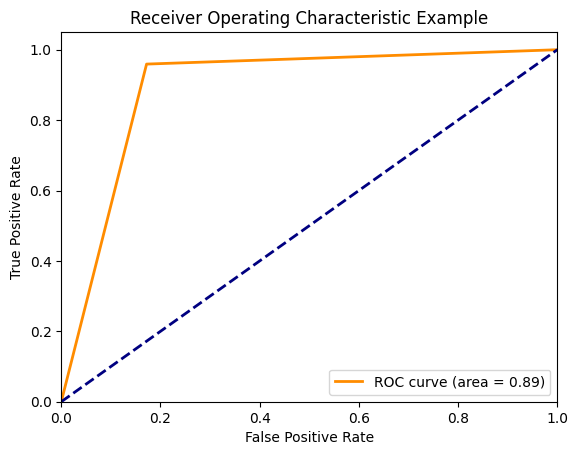

In [48]:
#random forest
np.random.seed(0)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
paramGrid={
    'n_estimators' : [10,100,200,500,1000],
    'max_depth' : [10,20,50],
    'min_samples_leaf' : [2,4,6,8,10],
    'max_features' : ['sqrt','log2'],
    'max_samples' : [100,200,500],
    

}

model_randomSerach = RandomizedSearchCV(estimator=rf_model,param_distributions=paramGrid,
                                        scoring=['recall','precision','accuracy'],cv=5,refit='precision')
model_randomSerach.fit(x_train,y_train)
y_pred_rand=model_randomSerach.predict(x_test)
print(classification_report(y_test,y_pred_rand))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rand)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.32      0.45       157
           1       0.72      0.95      0.82       294

    accuracy                           0.73       451
   macro avg       0.75      0.63      0.64       451
weighted avg       0.74      0.73      0.69       451

{'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


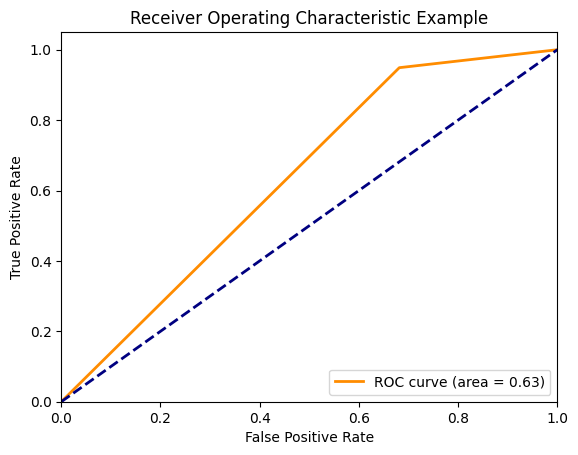

In [49]:
# Logistic regression
import warnings
warnings.simplefilter("ignore")
np.random.seed(0)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
paramGrid={
    'penalty':['l1','l2'],
    'max_iter' : [100,200,500,1000],
    'solver': ['liblinear','saga'],
    }
grid_logistic = GridSearchCV(estimator=lg,param_grid=paramGrid)
grid_logistic.fit(x_train,y_train)
y_pred_grid=grid_logistic.predict(x_test)
print(classification_report(y_test,y_pred_grid))
print(grid_logistic.best_params_)


from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.32      0.45       157
           1       0.72      0.95      0.82       294

    accuracy                           0.73       451
   macro avg       0.75      0.63      0.64       451
weighted avg       0.74      0.73      0.69       451

{'n_estimators': 40, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}


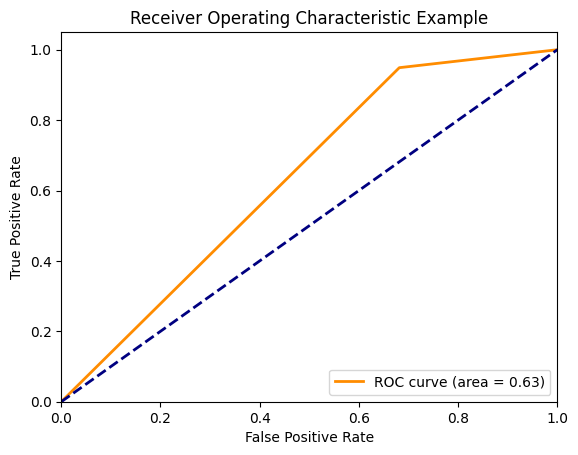

In [50]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier 
xgtrain=GradientBoostingClassifier()
random_bayes= RandomizedSearchCV(xgtrain,{
     'n_estimators' :[10,20,30,40,50,100,200,500],
    'max_depth' : [1,15],
    'min_samples_leaf' : [2,6],
    'max_features' : ['sqrt','log2'],

},
n_iter=80,random_state=1,cv=5,n_jobs=-1)
random_bayes.fit(x_train,y_train)
y_pred_grid=grid_logistic.predict(x_test)
print(classification_report(y_test,y_pred_grid))
print(random_bayes.best_params_)



from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       157
           1       0.96      0.98      0.97       294

    accuracy                           0.96       451
   macro avg       0.96      0.95      0.95       451
weighted avg       0.96      0.96      0.96       451

{'C': 4, 'degree': 5, 'kernel': 'poly', 'max_iter': 1000}


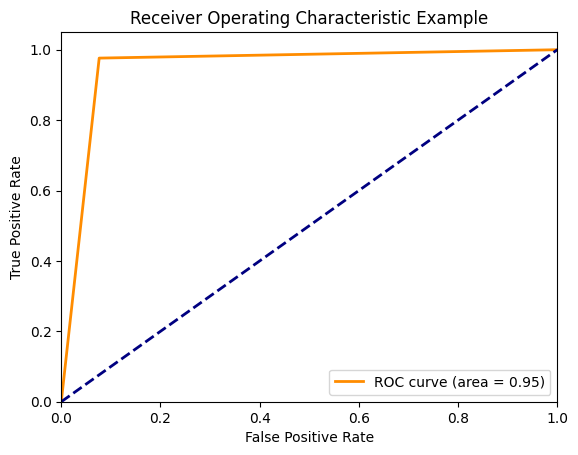

In [51]:
# SVM
import warnings
warnings.simplefilter("ignore")
np.random.seed(0)
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm=SVC()
paramGrid_svm={
    'C':[0.001,0.01,0.05,0.005,0.1,1,2,3,4,5],
    'kernel' : ['rbf','linear','sigmoid','poly'],
    'degree' : [2,3,5],
    'max_iter' : [100,200,300,500,1000]
}
grid_svm = GridSearchCV(estimator=svm,param_grid=paramGrid_svm)
grid_svm.fit(x_train,y_train)
y_pred_grid=grid_svm.predict(x_test)
print(classification_report(y_test,y_pred_grid))
print(grid_svm.best_params_)



from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

Feature 0: 0.0773835920177384
Feature 1: 0.11330376940133038
Feature 2: 0.10753880266075388
Feature 3: 0.09135254988913528
Feature 4: 0.13835920177383593
Feature 5: 0.1190687361419069
Feature 6: 0.21751662971175173
Feature 7: 0.10709534368070954
Feature 8: 0.11219512195121953


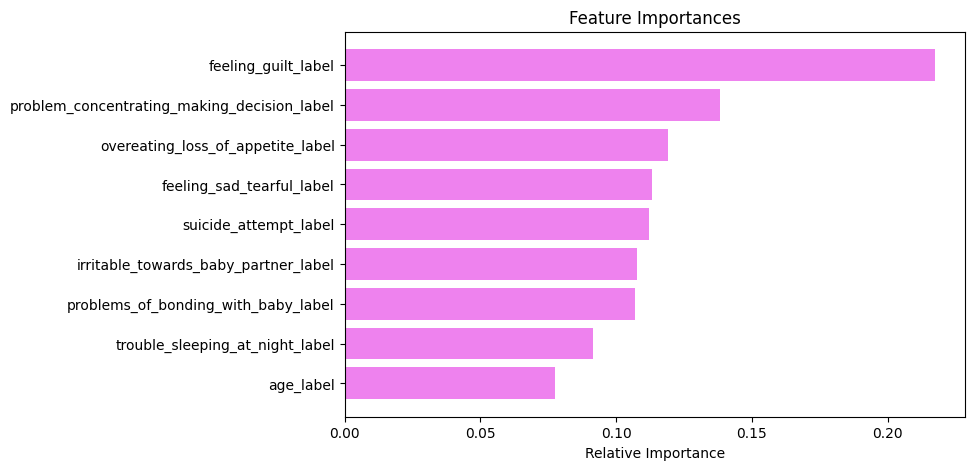

In [52]:
# Feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(grid_svm, x_test, y_test, n_repeats=10, random_state=42)
importance_scores = result.importances_mean
indices = np.argsort(importance_scores)

for i, score in enumerate(importance_scores):
    print(f"Feature {i}: {score}")
    
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importance_scores[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_list[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

From the Above AUC curve we can understand that at 0.05 only we are getting a TPR of 1 and the main important thing is after 0.2 the false positives are 0 which suggests that it is performing decently.

So here don't think that they are not being made to 1 when we add the thing is in permutation feature importance they dont normalise and even we have categorical values which indicate we should normalise and the output's simple mean that higher the vale the more the importance.

Here we are selecting the SVM as the final model as it is showing the better performance with the metrics.

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       157
           1       0.91      0.97      0.94       294

    accuracy                           0.92       451
   macro avg       0.92      0.90      0.91       451
weighted avg       0.92      0.92      0.92       451



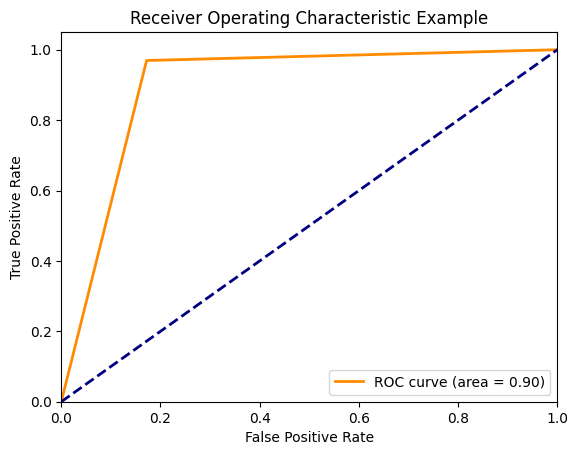

In [55]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix
k_model = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
k_model.fit(x_train, y_train)
y_pred = k_model.predict(x_test)
print(classification_report(y_test,y_pred))
# The n neighbours value will be choosen based on the performance
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

Based on all the metrics the SVM is performing good.